<a href="https://colab.research.google.com/github/Yossef-Dawoad/clip.cpp/blob/add_colab_notebook_example/examples/python_bindings/notebooks/clipcpp_demo.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading an image from internet

In [ ]:
!wget https://i.imgur.com/8H7XCH0.jpg -O cat.jpg

--2023-09-13 19:58:43--  https://i.imgur.com/8H7XCH0.jpg
Resolving i.imgur.com (i.imgur.com)... 146.75.92.193
Connecting to i.imgur.com (i.imgur.com)|146.75.92.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44544 (44K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>]  43.50K  --.-KB/s    in 0.006s  

2023-09-13 19:58:43 (7.65 MB/s) - ‘cat.jpg’ saved [44544/44544]



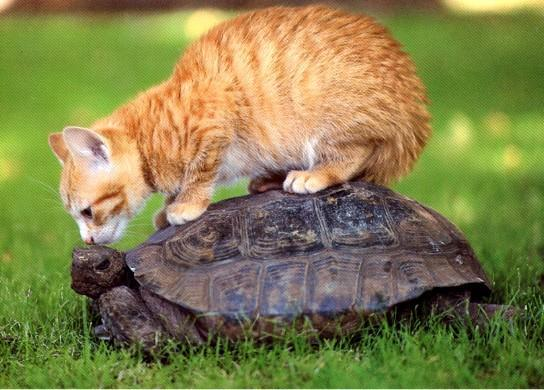

In [ ]:
from IPython.display import Image
Image('cat.jpg')

## Building Clip.cpp repo from source (not required)

In [ ]:
!git clone --recurse-submodules https://github.com/monatis/clip.cpp.git

Cloning into 'clip.cpp'...
remote: Enumerating objects: 610, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 610 (delta 58), reused 65 (delta 42), pack-reused 493
Receiving objects: 100% (610/610), 345.21 KiB | 11.51 MiB/s, done.
Resolving deltas: 100% (346/346), done.
Submodule 'ggml' (https://github.com/ggerganov/ggml.git) registered for path 'ggml'
Cloning into '/content/clip.cpp/ggml'...
remote: Enumerating objects: 3426, done.        
remote: Counting objects: 100% (1336/1336), done.        
remote: Compressing objects: 100% (187/187), done.        
remote: Total 3426 (delta 1198), reused 1212 (delta 1141), pack-reused 2090        
Receiving objects: 100% (3426/3426), 5.12 MiB | 26.76 MiB/s, done.
Resolving deltas: 100% (2292/2292), done.
Submodule path 'ggml': checked out 'dd1d575956e54c5bdc07632f25506b3b1884dbd2'


In [ ]:
%cd clip.cpp
!mkdir build
%cd build

/content/clip.cpp
/content/clip.cpp/build


In [ ]:
!cmake -DCLIP_NATIVE=ON -DCLIP_BUILD_IMAGE_SEARCH=ON ..
!make

-- CMAKE_SYSTEM_PROCESSOR: x86_64
-- x86 detected
CMake Deprecation Warning at ggml/CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 3.5 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- CMAKE_SYSTEM_PROCESSOR: x86_64
-- x86 detected
-- Linux detected
CMake Deprecation Warning at build/_deps/usearch-src/CMakeLists.txt:3 (cmake_minimum_required):
  Compatibility with CMake < 3.5 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- Configuring done (0.2s)
-- Generating done (0.0s)
-- Build files have been written to: /content/clip.cpp/build
[ 14%] Built target ggml
[ 23%] Built target clip
[ 33%] Built target quantize
[ 38%] Building CXX object examples/CMakeFiles

### Usage
- first download a quantized ggml model or build it your self using the information provided in the repository
-  now grab `the model`, `the image`, and the `text` you download to compare, Here is the Usage commands :

```bash
Usage: ./bin/main [options]                                                                                             
                                                                                                                        
Options:  -h, --help: Show this message and exit                                                                        
  -m <path>, --model <path>: path to model. Default: models/ggml-model-f16.bin                                          
  -t N, --threads N: Number of threads to use for inference. Default: 4                                                 
  --text <text>: Text to encode. At least one text should be specified                                                  
  --image <path>: Path to an image file. At least one image path should be specified                                    
  -v <level>, --verbose <level>: Control the level of verbosity. 0 = minimum, 2 = maximum. Default: 1                    
  ```

In [ ]:
# downloading pre-trained quantized GGML models from HF
!mkdir clip_models
!git clone https://huggingface.co/Green-Sky/ggml_laion_clip-vit-b-32-laion2b-s34b-b79k/ ./clip_models/

Cloning into './clip_models'...
remote: Enumerating objects: 32, done.
remote: Total 32 (delta 0), reused 0 (delta 0), pack-reused 32
Unpacking objects: 100% (32/32), 3.70 KiB | 631.00 KiB/s, done.
Filtering content: 100% (3/3), 469.74 MiB | 46.56 MiB/s, done.


In [ ]:
!./bin/main \
 --model './clip_models/laion_clip-vit-b-32-laion2b-s34b-b79k.ggmlv0.q4_1.bin' \
 --image '/content/cat.jpg' \
 --text 'cat on a Turtle'

clip_model_load: loading model from './clip_models/laion_clip-vit-b-32-laion2b-s34b-b79k.ggmlv0.q4_1.bin' - please wait....................................................clip_model_load: model size =    93.92 MB / num tensors = 397
clip_model_load: model loaded

main: Similarity score = 0.278


Timings
main: Model loaded in    72.49 ms
main: Image loaded in     1.96 ms
main: Similarity score calculated in   269.00 ms
main: Total time:   343.50 ms


## Using the Python Bindings

In [ ]:
!pip install -U clip_cpp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.7/349.7 kB 5.8 MB/s eta 0:00:00


### downloading pre-trained quantized GGML models from HF

In [ ]:
%cd /content/
!git clone https://huggingface.co/Green-Sky/ggml_laion_clip-vit-b-32-laion2b-s34b-b79k/
!mv ./ggml_laion_clip-vit-b-32-laion2b-s34b-b79k clip_models/

/content
Cloning into 'ggml_laion_clip-vit-b-32-laion2b-s34b-b79k'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 32 (delta 8), reused 0 (delta 0), pack-reused 13
Unpacking objects: 100% (32/32), 3.95 KiB | 506.00 KiB/s, done.
Filtering content: 100% (3/3), 469.74 MiB | 41.28 MiB/s, done.


In [ ]:
from clip_cpp import Clip

#loading the ggml model to Clip
model = Clip(
    model_file='./clip_models/laion_clip-vit-b-32-laion2b-s34b-b79k.ggmlv0.q4_1.bin',
    verbosity=2,
)

In [ ]:

text_2encode = 'cat on a Turtle'

tokens = model.tokenize(text_2encode)
text_embed = model.encode_text(tokens)

In [ ]:
## load and extract embedings of an image from the disk
image_2encode = '/content/cat.jpg'
image_embed = model.load_preprocess_encode_image(image_2encode)

In [ ]:
## perform similarity search between the image and the text
score = model.calculate_similarity(text_embed, image_embed)

# Alternatively, you can just do:
# score = model.compare_text_and_image(text, image_path)

print(f"Similarity score: {score}")

Similarity score: 0.2775198221206665


In [ ]:
text = 'dog eats a banana' ## unreleavant text compare to the image to see the score
score = model.compare_text_and_image(text, image_2encode);
print(f"Similarity score: {score}") # should be lower than the prev score

Similarity score: 0.10214703530073166


## More Real world Use-case example with fashion image dataset

In [ ]:
!pip install -q -U datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 10.2 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

data = load_dataset(
    "ashraq/fashion-product-images-small",
    split="train"
)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/44072 [00:00<?, ? examples/s]

In [ ]:
images = data["image"]

data = data.remove_columns("image")
product_frame = data.to_pandas()

In [ ]:
product_data = product_frame.reset_index(drop=True).to_dict(orient='index') # remove pandas default index and convert it to dict

In [ ]:
from pathlib import Path

#create an image dirctory to save the images to loaded with clip model
## ⚠️⚠️ currently clip Model it only Support loading images from disk not as PIL or numpy array for example
images_dir = Path('images')
images_dir.mkdir(exist_ok=True)

In [ ]:
image_files = []

##⚠️ it take about ~30 min to embed 5000 images of fashion dataset
## in the next cell you can download already 5000 extracted embeding inseated of waiting 😊
for idx, im in enumerate(images[:5000]):
    file_n = f'images/image_{idx}.jpeg'
    im.save(file_n, "JPEG")
    image_files.append(file_n)

In [ ]:
from tqdm import tqdm
import numpy as np

##⚠️it take about ~30 min to embed 5000 images of fashion dataset
# image_embeddings = [model.load_preprocess_encode_image(im) for im in tqdm(image_files)]
# image_embeddings = np.array(image_embeddings, dtype=np.float16)

# if you had already embedding saved as npy you can load it like this:
# image_embeddings = np.load('data.npy')

## 💡💡download & load already emded 5000 images from fashion dataset
## if you had already embedding saved as npy you can load it like this:
!wget "https://drive.google.com/uc?export=download&id=1kiewhrTHokuR7uuIYscOd3tGRVISXETF&confirm=yes" -O ./data.npy
image_embeddings = np.load('data.npy')

--2023-09-13 20:37:26--  https://drive.google.com/uc?export=download&id=1kiewhrTHokuR7uuIYscOd3tGRVISXETF&confirm=yes
Resolving drive.google.com (drive.google.com)... 142.251.2.102, 142.251.2.139, 142.251.2.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/apveta40b3dk2j1ontg5jj81f158mk65/1694637375000/07515041808419291303/*/1kiewhrTHokuR7uuIYscOd3tGRVISXETF?e=download&uuid=02003cac-cc45-4843-91dd-51c10f91b89c [following]
--2023-09-13 20:37:26--  https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/apveta40b3dk2j1ontg5jj81f158mk65/1694637375000/07515041808419291303/*/1kiewhrTHokuR7uuIYscOd3tGRVISXETF?e=download&uuid=02003cac-cc45-4843-91dd-51c10f91b89c
Resolving doc-04-4s-docs.googleusercontent.com (doc-04-4s-docs.googleusercontent.com)... 142.251.2.132

### saving the imbeddings to disk for faster retrieval

In [ ]:
np.save('data.npy', image_embeddings)

## USearch Vector Store for faster lookup

In [ ]:
!pip install -q -U usearch

In [ ]:
import numpy as np
from usearch.index import Index

In [ ]:
image_embeddings.shape # ndim is -> 512

(5000, 512)

In [ ]:
index = Index(
    ndim=512, # Define the number of dimensions in input vectors
    metric='l2sq', # Choose 'cos', 'l2sq', 'haversine' or other metric, default = 'ip'
    dtype='f16', # Quantize to 'f16' or 'i8' if needed, default = 'f32'
)

In [ ]:
## each vector should have corrsponding key hence range(...)
index.add(range(len(image_embeddings)), image_embeddings)

array([   0,    1,    2, ..., 4997, 4998, 4999], dtype=uint64)

In [ ]:
def search_images_vecstore(query: str, index: Index) -> list:
    """
    extract query embeddings and run it against the usearch vector store
    return list of keys, distance (keys is the index of the crosponding image)
    """
    tokens = model.tokenize(query)
    query_embedded = np.array(model.encode_text(tokens))

    matches = index.search(query_embedded, count=10)
    return matches.to_list()


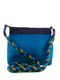

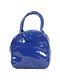

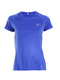

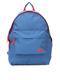

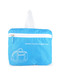

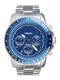

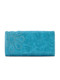

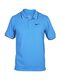

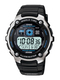

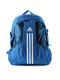

In [ ]:
from IPython.display import display


results = search_images_vecstore('blue bag', index)

for (img_idx, dist) in results:
    display(images[img_idx])

### Native lookup without vector store (it should be not as fast as vs)

In [ ]:
def semantic_search(query_embed: list[float], embeddings: list[list[float]], top_k: int = 5):
    scores = []
    for idx, image_embeddings in enumerate(embeddings):
        score = model.calculate_similarity(query_embed, image_embeddings)
        scores.append([score, idx])
    # Sort the list in descending order based on the score
    scores.sort(key = lambda x: x[0], reverse=True)
    return scores[:top_k]


def search_images(query: str, embeddings: list[list[float]], top_k: int=5):
    tokens = model.tokenize(query)
    query_embed = model.encode_text(tokens)

    results = semantic_search(query_embed, embeddings, top_k=top_k)
    return results

In [ ]:
x = search_images('blue bag', image_embeddings, top_k=10);x

[[0.22824887931346893, 4414],
 [0.19111284613609314, 118],
 [0.19099275767803192, 1158],
 [0.189880833029747, 3885],
 [0.1881013661623001, 2623],
 [0.18806062638759613, 1114],
 [0.18627814948558807, 777],
 [0.18402709066867828, 949],
 [0.18311555683612823, 3729],
 [0.1786075383424759, 1301]]

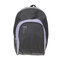

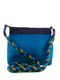

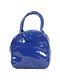

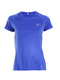

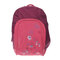

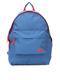

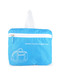

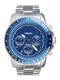

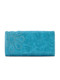

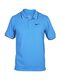

In [ ]:
from IPython.display import display

for (score, im_idx) in x:
    display(images[im_idx])